In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [27]:
def plot_saves(file, header):
    plt.xlabel('No. of Generations')
    plt.ylabel('Accuracy')
    plt.title(header)
    
    x = range(1, 101)
    for run in file:
        y = run[1]
        plt.plot(x, y)

    plt.show()

In [19]:
def compare_saves(files, legends):
    plt.xlabel('No. of Generations')
    plt.ylabel('Accuracy')
    
    x = range(1, 101)

    for f in files:
        avg_of_runs = np.array(f[0][1])
        for i in f[1:]:
            avg_of_runs += i[1]
        avg_of_runs = avg_of_runs / len(f) 

        plt.plot(x, avg_of_runs)
    plt.legend(legends)
    plt.show()

In [18]:
ga_path = 'pickles/ga/30runs/'
kbga_path = 'pickles/kbga/30runs/'
de_path = 'pickles/de/'
kbde_path = 'pickles/kbde/'

In [4]:
ga_files = ['30_run_az_ga_ts.pkl',
            '30_run_imdb_ga_ts.pkl',
            '30_run_yelp_ga_ts.pkl'
            ]

In [15]:
kbga_files = [
            '30_run_az_kbga_vp_ts.pkl',
            '30_run_az_kbga_es50_100_ts.pkl',
            '30_run_imdb_kbga_vp_ts.pkl',
            '30_run_imdb_kbga_es50_100_ts.pkl',
            '30_run_yelp_kbga_vp_ts.pkl',
            '30_run_yelp_kbga_es50_100_ts.pkl',
            ]

In [50]:
de_files = [
            '30_run_az_de.pkl',
            'n_run_az_de_crt.pkl',
            'n_run_az_de_crt1.pkl',
            ]

In [35]:
kbde_files = [
            '30_run_az_kbde.pkl',
            'n_run_az_kbde_crt1.pkl',
            ]

## Comparison

In [51]:
rf = open(de_path+de_files[0], 'rb')
de_30 = pickle.load(rf)

rf = open(de_path+de_files[1], 'rb')
de_5 = pickle.load(rf)

rf = open(de_path+de_files[2], 'rb')
de1_5 = pickle.load(rf)

rf = open(ga_path+ga_files[0], 'rb')
ga_30 = pickle.load(rf)

rf = open(kbga_path+kbga_files[0], 'rb')
kbga_30 = pickle.load(rf)

rf = open(kbde_path+kbde_files[0], 'rb')
kbde_5 = pickle.load(rf)

rf = open(kbde_path+kbde_files[1], 'rb')
kbde1_5 = pickle.load(rf)

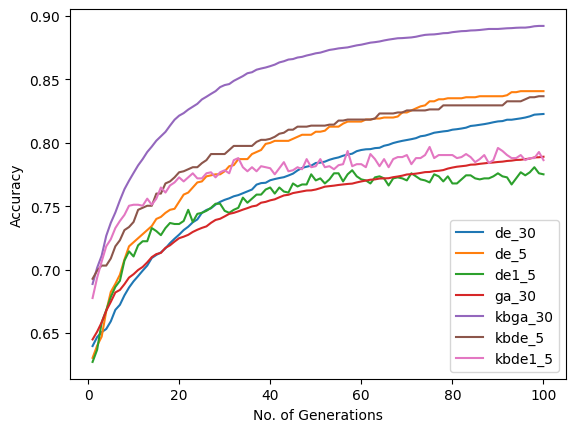

In [52]:
legends = [
    "de_30", "de_5", "de1_5",
    "ga_30", "kbga_30", 
    "kbde_5", "kbde1_5"
    ]

compare_saves(
    [de_30, de_5, de1_5,
     ga_30, kbga_30, 
     kbde_5, kbde1_5], 
     legends
     )

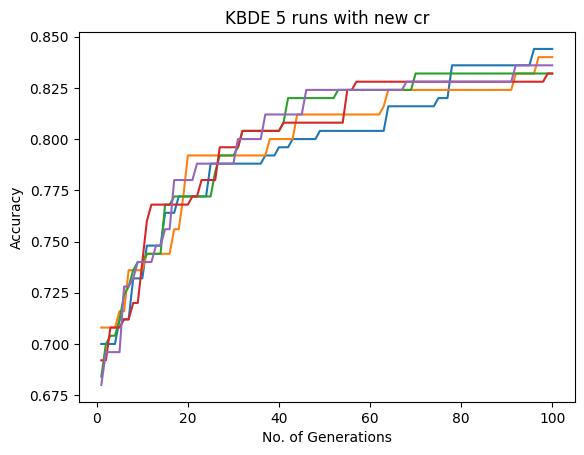

In [49]:
plot_saves(kbde_5, "KBDE 5 runs with new cr")